In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data_clients = pd.read_csv("clients_habitudes.csv")
data_clients.head()

,Client_ID,Montant_Depense,Frequence_Achat,Anciennete_Mois
0,1,150,5,12
1,2,200,6,24
2,3,450,7,6
3,4,300,8,18
4,5,250,5,36


In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clients)

C:\Users\abbab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


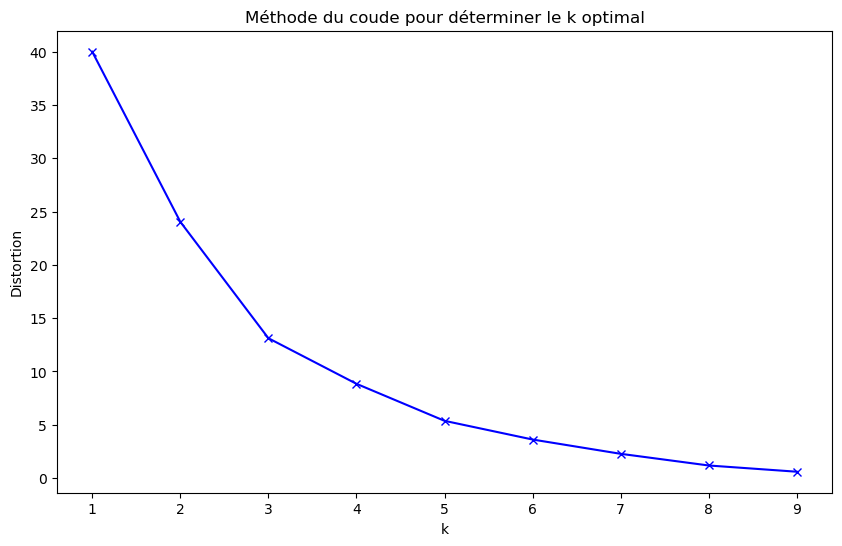

In [4]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Méthode du coude pour déterminer le k optimal')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
data_clients['Segment'] = clusters

In [6]:
data_clients.groupby('Segment').mean()

,Client_ID,Montant_Depense,Frequence_Achat,Anciennete_Mois
Segment,,,,
0,8.0,362.5,6.5,27.0
1,2.5,275.0,6.5,15.0
2,6.5,750.0,9.5,9.0
